<a href="https://colab.research.google.com/github/M-Harshitha-2005/Diseases_prediction/blob/main/Diseases_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinyhash","key":"d50d28e42b1130bf89642f814c67f588"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
pip install kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [5]:
import pandas as pd
df =pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [8]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [9]:
numeric_cols =df . select_dtypes(include= 'number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  #it will fill the missing values by using avg mean

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

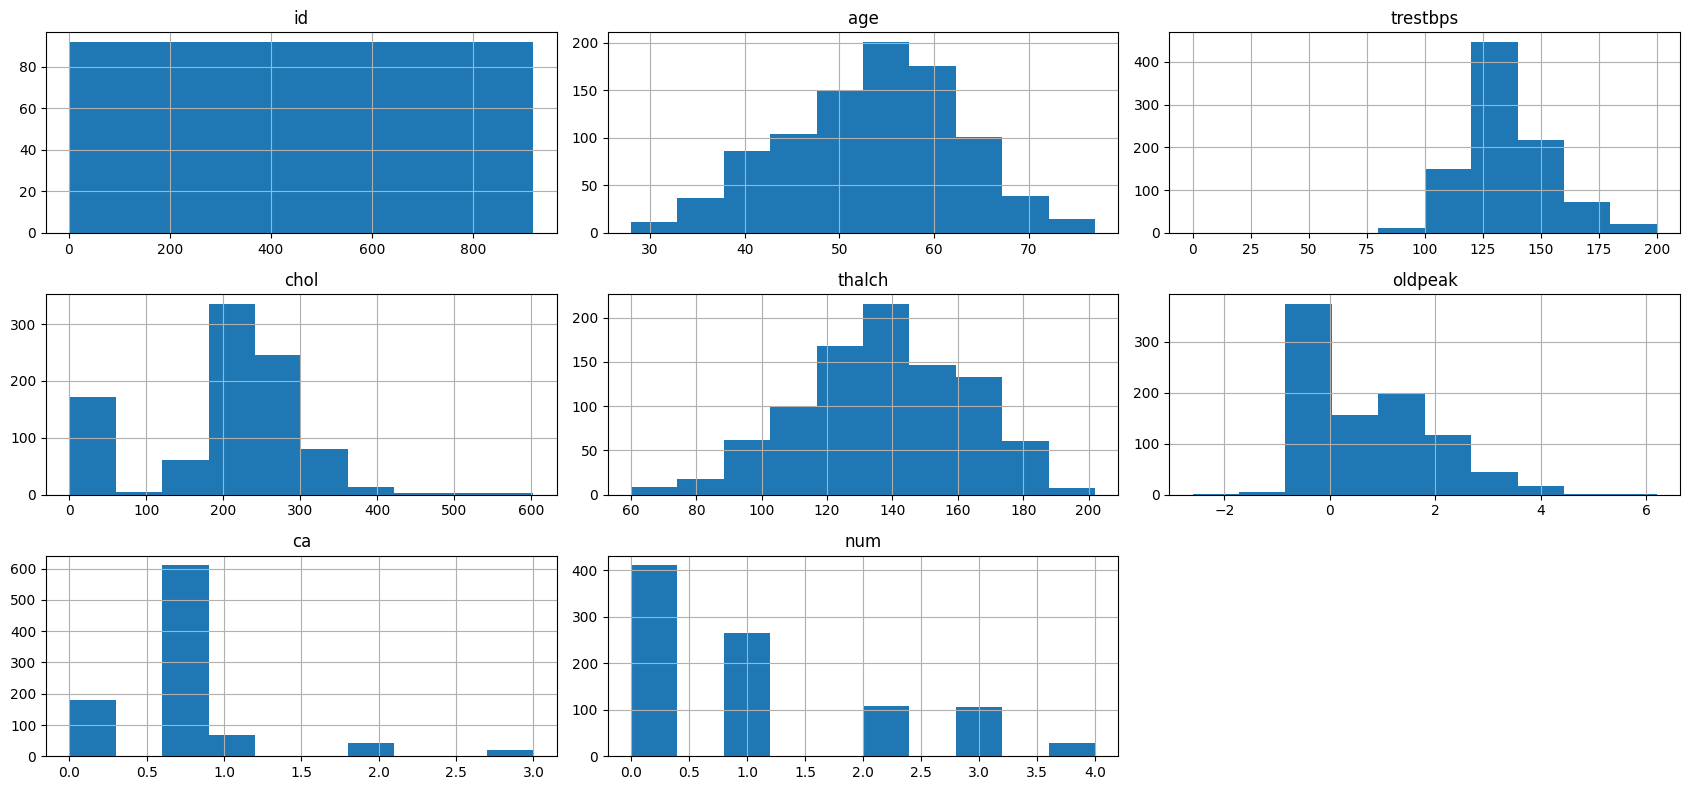

In [11]:
df[numeric_cols].hist(figsize=(17,8)) #hist= histogram
plt.tight_layout()
plt.show()

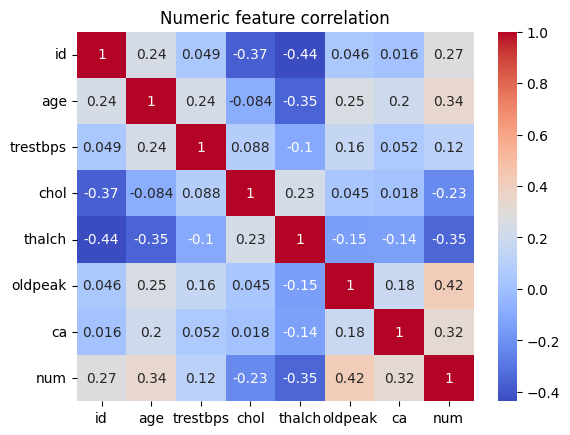

In [12]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm') # heat man shows how dence  the reation is
plt.title('Numeric feature correlation')
plt.show()

In [19]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')  # Don't encode target

In [20]:
X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)  # 0: no disease, 1: disease present


In [21]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)


Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#train logistic regression
from sklearn.linear_model import LogisticRegression


In [27]:
lr_modle = LogisticRegression()
lr_modle.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
#evalute logistic regression
y_pred_lr = lr_modle.predict(X_test_scaled)
print("logistics regression accuary:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

logistics regression accuary: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



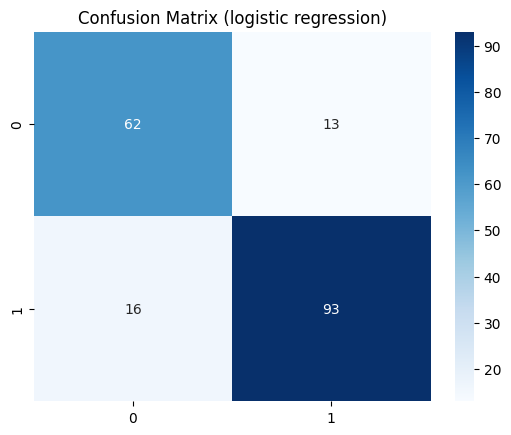

In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (logistic regression)')

plt.show()

In [33]:
#random forest for comparison
from sklearn.ensemble import RandomForestClassifier
rf_modle = RandomForestClassifier(n_estimators=110, random_state=34)
rf_modle.fit(X_train_scaled, y_train)
y_pred_rf = rf_modle.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8858695652173914


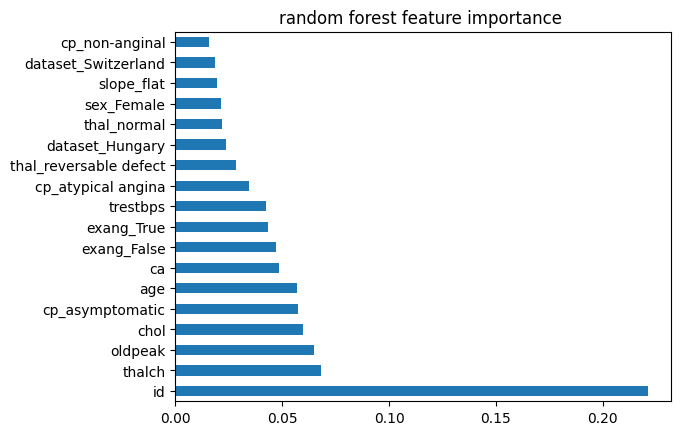

In [34]:
#feature importance
feat_imp = pd.Series(rf_modle.feature_importances_, index=X.columns)
feat_imp.nlargest(18).plot(kind='barh')
plt.title('random forest feature importance ')
plt.show()

In [36]:
import joblib
joblib.dump(rf_modle, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl' )

['heart_scaler.pkl']

In [37]:
sample = X.head(1)
sample.to_csv('heart_diseases_template.csv', index=False)
print("user template saved as 'heart_diseases_template.csv")

user template saved as 'heart_diseases_template.csv


In [39]:
from google.colab import files
uploaded = files.upload()

Saving heartdiseasestemplate.csv to heartdiseasestemplate.csv


In [41]:
import joblib
import pandas as pd
user_df = pd.read_csv('heartdiseasestemplate.csv')
#get columns list from traning dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()
# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]
# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())
# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')
    # Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)
    # One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)
# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds
print(user_df)


   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0       False      True   

   dataset_Cleveland  ...  restecg_st-t abnormality  exang_False  exang_True  \
0               True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0               True       False            False               True   

   thal_normal  thal_reversable defect  Heart_Disease_Prediction  
0        False                   False                         0  

[1 rows x 31 columns]
